# Machine Learning
## AI-CA#4

### Ali Pakdel Samadi
### 810198368

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("dataset.csv")
train_df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.6210,0.029700,G,0.1590,-7.429,Major,0.0382,142.065,0.6070,Jazz
1,FloFilz,Corners,34.0,0.34700,0.729,103703.0,0.5150,0.006920,C,0.1270,-10.147,Major,0.1840,79.969,0.2870,Jazz
2,Bonobo,We Could Forever,51.0,0.01810,0.669,NaN,0.8850,0.880000,G,0.2650,-7.080,Minor,0.0378,NaN,0.6360,Jazz
3,Nils Landgren,A Child Is Born,39.0,0.91800,0.484,228733.0,0.0693,0.000069,F,0.1390,-15.542,Major,0.0346,82.707,0.2060,Jazz
4,Masayoshi Takanaka,Samba Pati,36.0,0.03450,0.473,342867.0,0.8230,0.446000,G,0.3060,-6.625,Major,0.0630,104.694,0.3830,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Wolfgang Amadeus Mozart,"Die Zauberflöte, K. 620: Wie stark ist nicht d...",22.0,0.91100,0.326,368640.0,0.1330,0.000000,G,0.1300,-20.493,Major,0.0557,92.090,0.2060,Classical
29996,New York Philharmonic,"Symphony No. 2 in D Major, Op. 73: II. Adagio ...",26.0,0.96500,0.126,514213.0,0.2040,0.869000,B,0.1060,-16.474,Major,0.0395,82.437,0.0387,Classical
29997,Georges Bizet,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",54.0,0.97600,0.363,262147.0,0.1150,0.000000,D,0.0992,-17.325,Major,0.0689,NaN,0.2310,Classical
29998,Edvard Grieg,"Peer Gynt-Suite Nr. 1, Op. 46: I. Morning",42.0,0.98500,0.123,259573.0,0.0174,0.906000,E,0.1250,-23.671,Major,0.0408,71.705,0.0352,Classical


# Phase Zero: EDA and Visualization

### 1. Describe and Info functions

In [60]:
train_df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,30000.000000,30000.000000,30000.000000,2.699000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27067.000000,30000.000000
mean,47.769533,0.359661,0.540929,2.466460e+05,0.556709,0.180807,0.183610,-10.079862,0.083861,117.559824,0.446563
std,14.512665,0.364182,0.181719,1.126005e+05,0.277856,0.329365,0.150733,6.953936,0.093366,30.719934,0.248745
min,0.000000,0.000001,0.059600,1.550900e+04,0.000792,0.000000,0.015700,-47.046000,0.022300,34.347000,0.000000
25%,39.000000,0.029600,0.423000,1.904930e+05,0.361000,0.000000,0.095800,-12.057250,0.035000,92.340000,0.243000
50%,49.000000,0.205000,0.553000,2.245600e+05,0.602000,0.000089,0.122000,-7.623000,0.045100,115.491000,0.435000
75%,57.000000,0.710000,0.671000,2.726670e+05,0.786000,0.125250,0.222000,-5.429750,0.080300,139.817500,0.639000
max,99.000000,0.996000,0.977000,3.195440e+06,0.998000,0.994000,0.996000,1.342000,0.941000,219.331000,0.985000


In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
artist_name         28506 non-null object
track_name          30000 non-null object
popularity          30000 non-null float64
acousticness        30000 non-null float64
danceability        30000 non-null float64
duration_ms         26990 non-null float64
energy              30000 non-null float64
instrumentalness    30000 non-null float64
key                 30000 non-null object
liveness            30000 non-null float64
loudness            30000 non-null float64
mode                30000 non-null object
speechiness         30000 non-null float64
tempo               27067 non-null float64
valence             30000 non-null float64
music_genre         30000 non-null object
dtypes: float64(11), object(5)
memory usage: 3.7+ MB


### 2. Percentage of missing values in each column

In [62]:
train_df.isnull().sum()/len(train_df) * 100

artist_name          4.980000
track_name           0.000000
popularity           0.000000
acousticness         0.000000
danceability         0.000000
duration_ms         10.033333
energy               0.000000
instrumentalness     0.000000
key                  0.000000
liveness             0.000000
loudness             0.000000
mode                 0.000000
speechiness          0.000000
tempo                9.776667
valence              0.000000
music_genre          0.000000
dtype: float64

### 3. Histograms

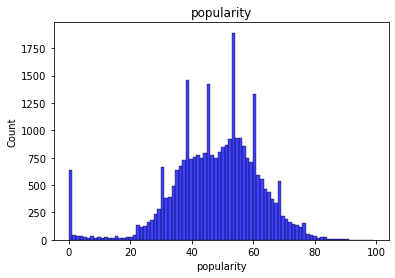

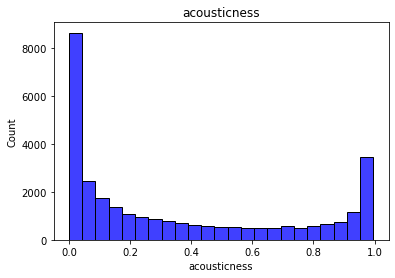

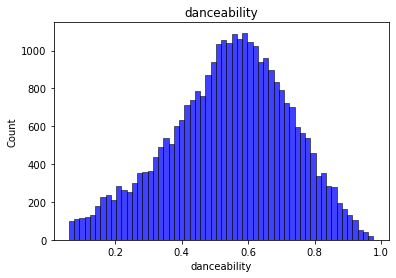

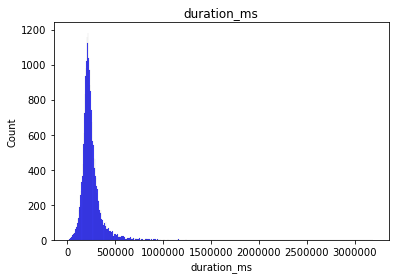

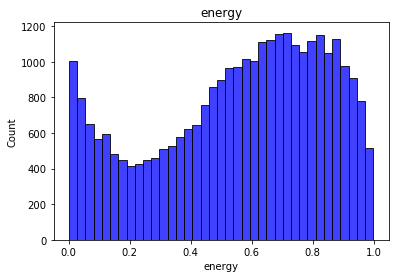

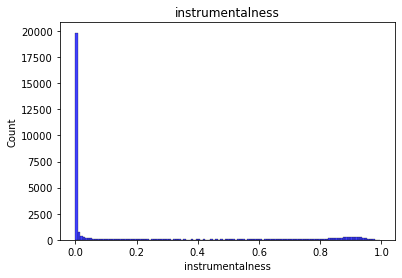

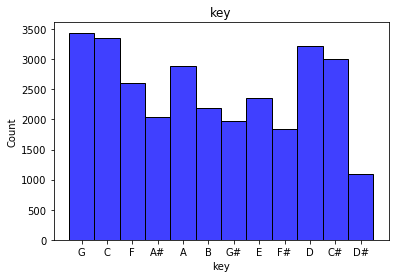

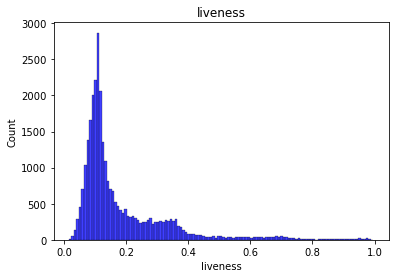

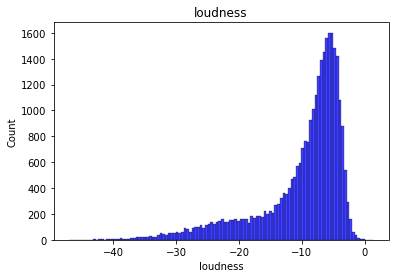

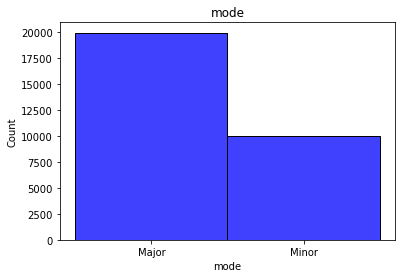

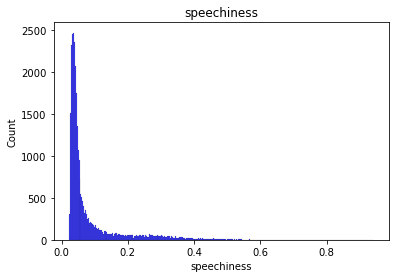

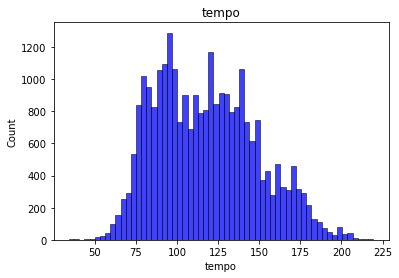

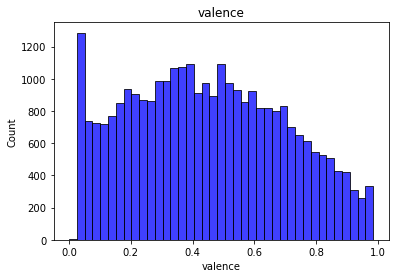

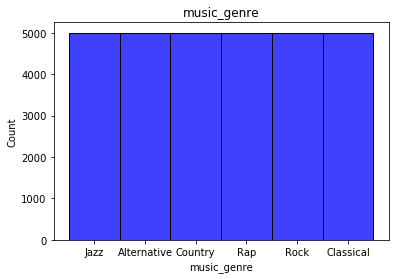

In [63]:
cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 
        'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'music_genre']

for col in cols:
    ax = sns.histplot(train_df[col], color="b")
    plt.title(col)
    plt.show()

# Phase One: Preprocessing

### 2.  Fill NaNs

In [64]:
num_cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 
        'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

obj_cols = ['artist_name', 'track_name', 'key', 'mode', 'music_genre']

print(train_df.isna().sum())

for col in num_cols:
    mean = train_df[col].mean()
    train_df[col] = train_df[col].replace(to_replace= np.nan, value= mean)

for col in obj_cols:
    mode = train_df[col].mode()
    train_df[col] = train_df[col].replace(to_replace= np.nan, value= mode[0])


    
print(train_df.isna().sum())

artist_name         1494
track_name             0
popularity             0
acousticness           0
danceability           0
duration_ms         3010
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                   0
speechiness            0
tempo               2933
valence                0
music_genre            0
dtype: int64
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64


### 4. Standardization

In [65]:
stan_df = train_df.copy()

for col in num_cols:
    mean = stan_df[col].mean()
    std = stan_df[col].std()
    stan_df[col] = (stan_df[col] - mean) / std

display(stan_df)

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",-0.259741,-0.970532,0.935904,0.368353,0.231381,-0.458783,G,-0.163272,0.381203,Major,-0.489052,0.839806,0.644987,Jazz
1,FloFilz,Corners,-0.948794,-0.034765,1.034959,-1.338391,-0.150111,-0.527946,C,-0.375567,-0.009655,Major,1.072549,-1.288258,-0.641471,Jazz
2,Bonobo,We Could Forever,0.222596,-0.937884,0.704778,0.000000,1.181513,2.122853,G,0.539958,0.431391,Minor,-0.493336,0.000000,0.761572,Jazz
3,Nils Landgren,A Child Is Born,-0.604268,1.533131,-0.313279,-0.167722,-1.754179,-0.548746,F,-0.295956,-0.785474,Major,-0.527610,-1.194425,-0.967105,Jazz
4,Masayoshi Takanaka,Samba Pati,-0.810984,-0.892852,-0.373812,0.900927,0.958376,0.805165,G,0.811962,0.496821,Major,-0.223430,-0.440919,-0.255534,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Wolfgang Amadeus Mozart,"Die Zauberflöte, K. 620: Wie stark ist nicht d...",-1.775658,1.513910,-1.182754,1.142242,-1.524924,-0.548956,G,-0.355665,-1.497445,Major,-0.301617,-0.872865,-0.967105,Classical
29996,New York Philharmonic,"Symphony No. 2 in D Major, Op. 73: II. Adagio ...",-1.500037,1.662188,-2.283356,2.505257,-1.269396,2.089455,B,-0.514887,-0.919499,Major,-0.475128,-1.203678,-1.639681,Classical
29997,Georges Bizet,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",0.429312,1.692392,-0.979143,0.145137,-1.589705,-0.548956,D,-0.559999,-1.041876,Major,-0.160237,0.000000,-0.866601,Classical
29998,Edvard Grieg,"Peer Gynt-Suite Nr. 1, Op. 46: I. Morning",-0.397552,1.717105,-2.299865,0.121036,-1.940966,2.201793,E,-0.388836,-1.954453,Major,-0.461204,-1.571470,-1.653752,Classical


### 5. Encode object columns

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

one_hot_cols = ['key', 'mode']

one_hot_df = stan_df[['key', 'mode']]

enc = OneHotEncoder()
one_hot_enc = enc.fit_transform(stan_df[one_hot_cols]).toarray()
enc_cols = enc.get_feature_names_out(one_hot_cols)
one_hot_df = pd.DataFrame(one_hot_enc, columns = enc_cols)

stan_df = stan_df.drop('key', 1)
stan_df = stan_df.drop('mode', 1)
stan_df = stan_df.drop('track_name', 1)
stan_df = stan_df.drop('music_genre', 1)

for col in enc_cols:
    stan_df[col] = one_hot_df[col]
    
    
enc = OrdinalEncoder()
enc.fit(stan_df[['artist_name']])
stan_df[['artist_name']] = enc.transform(stan_df[['artist_name']])

display(stan_df)

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,531.0,-0.259741,-0.970532,0.935904,0.368353,0.231381,-0.458783,-0.163272,0.381203,-0.489052,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1511.0,-0.948794,-0.034765,1.034959,-1.338391,-0.150111,-0.527946,-0.375567,-0.009655,1.072549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,582.0,0.222596,-0.937884,0.704778,0.000000,1.181513,2.122853,0.539958,0.431391,-0.493336,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,3210.0,-0.604268,1.533131,-0.313279,-0.167722,-1.754179,-0.548746,-0.295956,-0.785474,-0.527610,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2874.0,-0.810984,-0.892852,-0.373812,0.900927,0.958376,0.805165,0.811962,0.496821,-0.223430,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4924.0,-1.775658,1.513910,-1.182754,1.142242,-1.524924,-0.548956,-0.355665,-1.497445,-0.301617,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29996,3176.0,-1.500037,1.662188,-2.283356,2.505257,-1.269396,2.089455,-0.514887,-0.919499,-0.475128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,1662.0,0.429312,1.692392,-0.979143,0.145137,-1.589705,-0.548956,-0.559999,-1.041876,-0.160237,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,1330.0,-0.397552,1.717105,-2.299865,0.121036,-1.940966,2.201793,-0.388836,-1.954453,-0.461204,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### 6. Artist Name column

In [67]:
stan_df = stan_df.drop('artist_name', 1)

### 7. Information Gains

popularity  =  0.5100028739597322
acousticness  =  0.36079963513643554
danceability  =  0.27426914012650583
duration_ms  =  0.10375167698348475
energy  =  0.3258144102567644
instrumentalness  =  0.29587242317451556
liveness  =  0.010415280556609119
loudness  =  0.34651856162825334
speechiness  =  0.2110527010813268
tempo  =  0.09612965688027542
valence  =  0.14246048580265436
key_A  =  0.0
key_A#  =  0.0002553283856423505
key_B  =  0.0015816184688430823
key_C  =  0.0
key_C#  =  0.008036035558163679
key_D  =  0.0010053006506560713
key_D#  =  0.0
key_E  =  0.005144968637475156
key_F  =  0.0029718250006047775
key_F#  =  0.0058054469885497895
key_G  =  0.0009969730052183934
key_G#  =  0.0020375230742644135
mode_Major  =  0.03480214749733612
mode_Minor  =  0.03420819261050978


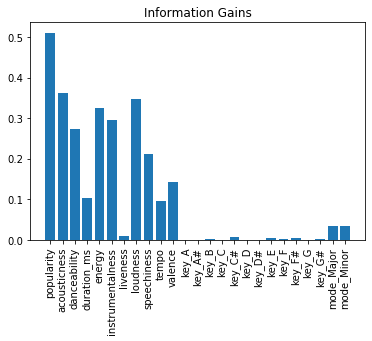

In [68]:
from sklearn.feature_selection import mutual_info_classif

information_gain =  mutual_info_classif(stan_df, train_df['music_genre'], discrete_features=False)

counter = 0
for col in stan_df.columns:
    print(col, ' = ' ,information_gain[counter])
    counter += 1

plt.bar(stan_df.columns, information_gain)
plt.xticks(rotation='vertical')
plt.title('Information Gains')
plt.show()

### 8. Removing not usefull features

In [69]:
counter = 0
for col in stan_df.columns:
    if information_gain[counter] < 0.1:
        stan_df = stan_df.drop(col, 1)
    counter += 1

stan_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,valence
0,-0.259741,-0.970532,0.935904,0.368353,0.231381,-0.458783,0.381203,-0.489052,0.644987
1,-0.948794,-0.034765,1.034959,-1.338391,-0.150111,-0.527946,-0.009655,1.072549,-0.641471
2,0.222596,-0.937884,0.704778,0.000000,1.181513,2.122853,0.431391,-0.493336,0.761572
3,-0.604268,1.533131,-0.313279,-0.167722,-1.754179,-0.548746,-0.785474,-0.527610,-0.967105
4,-0.810984,-0.892852,-0.373812,0.900927,0.958376,0.805165,0.496821,-0.223430,-0.255534
...,...,...,...,...,...,...,...,...,...
29995,-1.775658,1.513910,-1.182754,1.142242,-1.524924,-0.548956,-1.497445,-0.301617,-0.967105
29996,-1.500037,1.662188,-2.283356,2.505257,-1.269396,2.089455,-0.919499,-0.475128,-1.639681
29997,0.429312,1.692392,-0.979143,0.145137,-1.589705,-0.548956,-1.041876,-0.160237,-0.866601
29998,-0.397552,1.717105,-2.299865,0.121036,-1.940966,2.201793,-1.954453,-0.461204,-1.653752


# Phase Two: Model Training, Evaluation and Hyper Parameter Tuning

### 2. Train-Test Split

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(stan_df, train_df['music_genre'], test_size=0.3, random_state=42)

display(x_train, y_train)
display(x_test, y_test)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,valence
28465,0.911650,-0.556482,-0.472866,0.029231,0.749635,0.094707,-0.274684,-0.459062,-0.637451
27622,-3.291576,1.681409,-2.250338,0.000000,-1.882663,2.359672,-2.682529,-0.452636,-1.639279
28376,-0.328646,1.412313,-1.210269,-0.335003,-1.818961,-0.533229,-1.782895,-0.418362,-1.509830
10917,0.567123,-0.627874,1.381648,0.000000,-0.700756,-0.548956,-0.374340,2.893345,-0.754036
27234,-0.742078,1.714359,-1.694534,-0.553351,-1.864668,2.204829,-2.305908,-0.220217,-0.701773
...,...,...,...,...,...,...,...,...,...
29802,-0.328646,1.714359,-2.046727,0.382080,-1.671762,-0.548261,-1.135636,-0.411936,-1.511036
5390,0.980555,-0.987291,-0.819556,0.140764,1.509020,-0.548956,1.134733,0.247835,0.299251
860,-0.535362,-0.986923,-0.902101,0.833512,1.465832,-0.542550,0.704329,0.429915,-1.127913
15795,2.014135,-0.671808,0.979929,-0.280135,-0.214893,-0.548956,0.347841,6.395700,-0.408300


28465      Classical
27622      Classical
28376      Classical
10917        Country
27234      Classical
            ...     
29802      Classical
5390     Alternative
860             Jazz
15795            Rap
23654           Rock
Name: music_genre, Length: 21000, dtype: object

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,valence
2308,-0.328646,-0.957380,0.726790,0.503557,0.375340,1.397214,0.421037,-0.389444,1.509326
22404,0.773839,0.088800,0.605724,-1.015822,-0.945487,-0.548719,0.045134,-0.544747,-0.118847
23397,0.842744,0.838424,-0.726005,0.000000,-1.053457,-0.548470,-0.890595,-0.509402,-0.368099
25058,-3.291576,1.739072,-1.611989,-1.585296,-1.521325,2.195720,-0.704657,-0.388373,0.612825
2664,-0.328646,0.808220,1.266085,-0.799666,-0.653969,-0.548580,-0.083713,-0.527610,0.918359
...,...,...,...,...,...,...,...,...,...
3941,-0.397552,0.445764,-0.599435,-0.307925,-0.207695,0.380105,-0.282594,-0.546889,0.311312
17854,0.567123,-0.925802,1.238570,-0.235136,0.209787,-0.366484,0.841662,-0.371236,-1.123892
95,0.084786,-0.114395,0.534185,-1.138357,-1.750580,2.295913,-0.313080,0.869048,0.809814
6279,0.842744,0.418305,1.089989,-0.900113,-0.830320,-0.392595,-0.042586,-0.502976,-0.697753


2308            Jazz
22404           Rock
23397           Rock
25058      Classical
2664            Jazz
            ...     
3941            Jazz
17854            Rap
95              Jazz
6279     Alternative
26428      Classical
Name: music_genre, Length: 9000, dtype: object

### 3. KNN

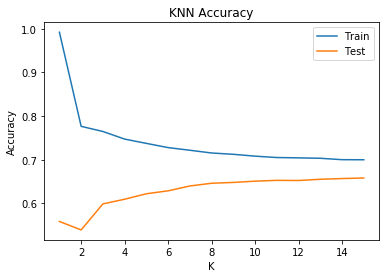

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_list_n = []
test_list_n = []

test_preds = []

for k in range(1, 16):
    neigh = KNeighborsClassifier(n_neighbors= k)

    neigh_fit = neigh.fit(x_train, y_train)
    
    train_pred = neigh_fit.predict(x_train)
    train_list_n.append(accuracy_score(y_train, train_pred))

    test_pred = neigh_fit.predict(x_test)
    test_preds.append(test_pred)
    test_list_n.append(accuracy_score(y_test, test_pred))

plt.plot(np.linspace(1, 15, 15), train_list_n, label='Train')
plt.plot(np.linspace(1, 15, 15), test_list_n, label='Test')
plt.legend(loc="best")
plt.title('KNN Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

### 4. Decision Tree -> Max Depth

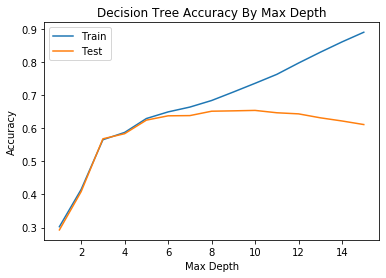

In [72]:
from sklearn.tree import DecisionTreeClassifier

def __DecisionTree(depth, min_leaf):
    
    tree = DecisionTreeClassifier(max_depth= depth, min_samples_leaf= min_leaf)

    tree_fit = tree.fit(x_train, y_train)

    train_pred_tree = tree_fit.predict(x_train)
    test_pred_tree = tree_fit.predict(x_test)
    
    return accuracy_score(y_train, train_pred_tree), accuracy_score(y_test, test_pred_tree), test_pred_tree

train_list_tree_d = []
test_list_tree_d = []
test_preds_tree_d = []

for k in range(1, 16):
    tr, te, pred = __DecisionTree(k, 1)
    train_list_tree_d.append(tr)
    test_list_tree_d.append(te)
    test_preds_tree_d.append(pred)
    
plt.plot(np.linspace(1, 15, 15), train_list_tree_d, label='Train')
plt.plot(np.linspace(1, 15, 15), test_list_tree_d, label='Test')
plt.legend(loc="best")
plt.title('Decision Tree Accuracy By Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

### 4. Decision Tree -> Min Samples Leaf

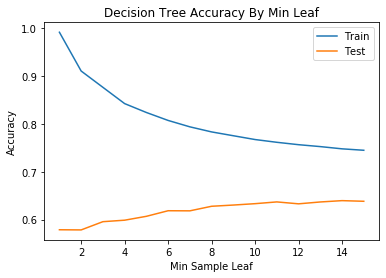

In [73]:
train_list_tree_l = []
test_list_tree_l = []
test_preds_tree_l = []

for l in range(1, 16):
    tr, te, pred = __DecisionTree(None, l)
    train_list_tree_l.append(tr)
    test_list_tree_l.append(te)
    test_preds_tree_l.append(pred)
    
plt.plot(np.linspace(1, 15, 15), train_list_tree_l, label='Train')
plt.plot(np.linspace(1, 15, 15), test_list_tree_l ,label='Test')
plt.legend(loc="best")
plt.title('Decision Tree Accuracy By Min Leaf')
plt.xlabel('Min Sample Leaf')
plt.ylabel('Accuracy')
plt.show()

### 6. Recall, Precision, Accuracy, F1 Score

### For KNN

In [74]:
from sklearn.metrics import classification_report

best_index = test_list_n.index(max(test_list_n))

print("Best K:", best_index + 1)
print(classification_report(y_test, test_preds[best_index]))
print("Accuracy for train: ", train_list_n[best_index])
print("Accuracy for test: ", test_list_n[best_index])

Best K: 15
              precision    recall  f1-score   support

 Alternative       0.50      0.40      0.45      1514
   Classical       0.89      0.89      0.89      1485
     Country       0.57      0.63      0.60      1550
        Jazz       0.70      0.63      0.66      1494
         Rap       0.73      0.79      0.75      1448
        Rock       0.56      0.63      0.59      1509

    accuracy                           0.66      9000
   macro avg       0.66      0.66      0.66      9000
weighted avg       0.66      0.66      0.66      9000

Accuracy for train:  0.7
Accuracy for test:  0.6582222222222223


### For Decision Tree by Max Depth

In [75]:
best_index1 = test_list_tree_d.index(max(test_list_tree_d))

print("Best Max-Depth:", best_index1 + 1)
print(classification_report(y_test, test_preds_tree_d[best_index1]))
print("Accuracy for train: ", train_list_tree_d[best_index1])
print("Accuracy for test: ", test_list_tree_d[best_index1])

Best Max-Depth: 10
              precision    recall  f1-score   support

 Alternative       0.54      0.34      0.42      1514
   Classical       0.88      0.86      0.87      1485
     Country       0.61      0.56      0.59      1550
        Jazz       0.62      0.69      0.65      1494
         Rap       0.75      0.76      0.75      1448
        Rock       0.54      0.72      0.62      1509

    accuracy                           0.65      9000
   macro avg       0.66      0.66      0.65      9000
weighted avg       0.65      0.65      0.65      9000

Accuracy for train:  0.7352857142857143
Accuracy for test:  0.6535555555555556


### For Decision Tree by Min Sample Leaf

In [76]:
best_index2 = test_list_tree_l.index(max(test_list_tree_l))

print("Best Min-Sample-Leaf:", best_index2 + 1)
print(classification_report(y_test, test_preds_tree_l[best_index2]))
print("Accuracy for train: ", train_list_tree_l[best_index2])
print("Accuracy for test: ", test_list_tree_l[best_index2])

Best Min-Sample-Leaf: 14
              precision    recall  f1-score   support

 Alternative       0.47      0.42      0.45      1514
   Classical       0.88      0.87      0.87      1485
     Country       0.58      0.56      0.57      1550
        Jazz       0.63      0.64      0.63      1494
         Rap       0.73      0.77      0.75      1448
        Rock       0.55      0.59      0.57      1509

    accuracy                           0.64      9000
   macro avg       0.64      0.64      0.64      9000
weighted avg       0.64      0.64      0.64      9000

Accuracy for train:  0.748
Accuracy for test:  0.6396666666666667


### For Decision Tree by Max Depth and Min Sample Leaf

In [77]:
train_acc, test_acc, pred = __DecisionTree(best_index1 + 1, best_index2 + 1)

print(classification_report(y_test, pred))
print("Accuracy for train: ", train_acc)
print("Accuracy for test: ", test_acc)

              precision    recall  f1-score   support

 Alternative       0.55      0.36      0.44      1514
   Classical       0.88      0.86      0.87      1485
     Country       0.61      0.56      0.59      1550
        Jazz       0.62      0.69      0.65      1494
         Rap       0.74      0.77      0.76      1448
        Rock       0.54      0.71      0.61      1509

    accuracy                           0.66      9000
   macro avg       0.66      0.66      0.65      9000
weighted avg       0.66      0.66      0.65      9000

Accuracy for train:  0.7128095238095238
Accuracy for test:  0.6561111111111111


# Phase Three: Ensemble Methods 

### 1. Random Forest by Max_Depth

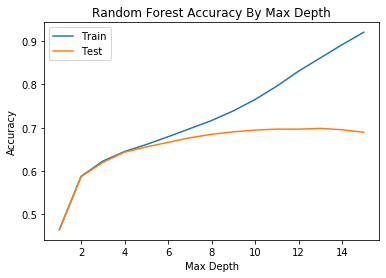

In [78]:
from sklearn.ensemble import RandomForestClassifier

def __RandomForest(depth, n_estimator, min_leaf):
    
    forest = RandomForestClassifier(max_depth= depth, n_estimators= n_estimator, min_samples_leaf= min_leaf)

    forest_fit = forest.fit(x_train, y_train)

    train_pred_forest = forest_fit.predict(x_train)

    test_pred_forest = forest_fit.predict(x_test)
    
    return accuracy_score(y_train, train_pred_forest), accuracy_score(y_test, test_pred_forest), test_pred_forest

train_list_forest_d = []
test_list_forest_d = []
test_preds_forest_d = []

for depth in range(1, 16):
    tr, te, pred = __RandomForest(depth, 100, 1)
    train_list_forest_d.append(tr)
    test_list_forest_d.append(te)
    test_preds_forest_d.append(pred)
    
plt.plot(np.linspace(1, 15, 15), train_list_forest_d, label='Train')
plt.plot(np.linspace(1, 15, 15), test_list_forest_d ,label='Test')
plt.legend(loc="best")
plt.title('Random Forest Accuracy By Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

### Random Forest by n_estimators

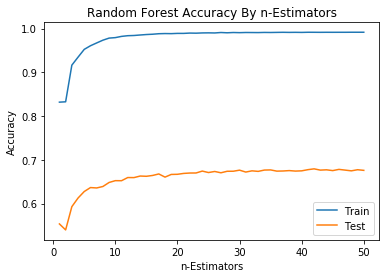

In [91]:
train_list_forest_n = []
test_list_forest_n = []
test_preds_forest_n = []

for n in range(1, 51):
    tr, te, pred = __RandomForest(None, n, 1)
    train_list_forest_n.append(tr)
    test_list_forest_n.append(te)
    test_preds_forest_n.append(pred)
    
plt.plot(np.linspace(1, 50, 50), train_list_forest_n, label='Train')
plt.plot(np.linspace(1, 50, 50), test_list_forest_n ,label='Test')
plt.legend(loc="best")
plt.title('Random Forest Accuracy By n-Estimators')
plt.xlabel('n-Estimators')
plt.ylabel('Accuracy')
plt.show()

### Random Forest by min_samples_leaf

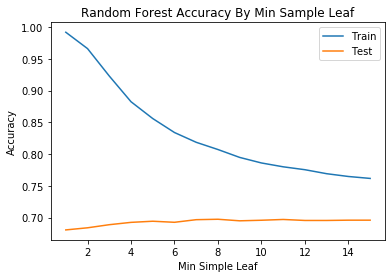

In [80]:
train_list_forest_l = []
test_list_forest_l = []
test_preds_forest_l = []

for l in range(1, 16):
    tr, te, pred = __RandomForest(None, 100, l)
    train_list_forest_l.append(tr)
    test_list_forest_l.append(te)
    test_preds_forest_l.append(pred)
    
plt.plot(np.linspace(1, 15, 15), train_list_forest_l, label='Train')
plt.plot(np.linspace(1, 15, 15), test_list_forest_l ,label='Test')
plt.legend(loc="best")
plt.title('Random Forest Accuracy By Min Sample Leaf')
plt.xlabel('Min Simple Leaf')
plt.ylabel('Accuracy')
plt.show()

### For Max_Depth

In [81]:
best_index3 = test_list_forest_d.index(max(test_list_forest_d))

print("Best Max-Depth:", best_index3)
print(classification_report(y_test, test_preds_forest_d[best_index3]))
print("Accuracy for train: ", train_list_forest_d[best_index3])
print("Accuracy for test: ", test_list_forest_d[best_index3])

Best Max-Depth: 12
              precision    recall  f1-score   support

 Alternative       0.60      0.41      0.49      1514
   Classical       0.92      0.89      0.90      1485
     Country       0.68      0.60      0.64      1550
        Jazz       0.71      0.73      0.72      1494
         Rap       0.76      0.80      0.78      1448
        Rock       0.54      0.76      0.63      1509

    accuracy                           0.70      9000
   macro avg       0.70      0.70      0.70      9000
weighted avg       0.70      0.70      0.69      9000

Accuracy for train:  0.8612857142857143
Accuracy for test:  0.6983333333333334


### For N_Estimators

In [92]:
best_index4 = test_list_forest_n.index(max(test_list_forest_n))

print("Best n:", best_index4)
print(classification_report(y_test, test_preds_forest_n[best_index4]))
print("Accuracy for train: ", train_list_forest_n[best_index4])
print("Accuracy for test: ", test_list_forest_n[best_index4])

Best n: 41
              precision    recall  f1-score   support

 Alternative       0.52      0.42      0.47      1514
   Classical       0.91      0.89      0.90      1485
     Country       0.65      0.61      0.63      1550
        Jazz       0.71      0.73      0.72      1494
         Rap       0.76      0.80      0.78      1448
        Rock       0.53      0.63      0.58      1509

    accuracy                           0.68      9000
   macro avg       0.68      0.68      0.68      9000
weighted avg       0.68      0.68      0.68      9000

Accuracy for train:  0.9915238095238095
Accuracy for test:  0.6794444444444444


### For Min_Samples_Leaf

In [83]:
best_index5 = test_list_forest_l.index(max(test_list_forest_l))

print("Best min_leaf:", best_index5)
print(classification_report(y_test, test_preds_forest_l[best_index5]))
print("Accuracy for train: ", train_list_forest_l[best_index5])
print("Accuracy for test: ", test_list_forest_l[best_index5])

Best min_leaf: 7
              precision    recall  f1-score   support

 Alternative       0.60      0.42      0.49      1514
   Classical       0.91      0.89      0.90      1485
     Country       0.68      0.60      0.64      1550
        Jazz       0.71      0.73      0.72      1494
         Rap       0.76      0.80      0.78      1448
        Rock       0.55      0.75      0.63      1509

    accuracy                           0.70      9000
   macro avg       0.70      0.70      0.70      9000
weighted avg       0.70      0.70      0.69      9000

Accuracy for train:  0.8071904761904762
Accuracy for test:  0.6974444444444444


### 4. Confusion Matrix

              precision    recall  f1-score   support

 Alternative       0.60      0.41      0.48      1514
   Classical       0.91      0.89      0.90      1485
     Country       0.67      0.59      0.63      1550
        Jazz       0.70      0.72      0.71      1494
         Rap       0.77      0.79      0.78      1448
        Rock       0.55      0.77      0.64      1509

    accuracy                           0.69      9000
   macro avg       0.70      0.69      0.69      9000
weighted avg       0.70      0.69      0.69      9000



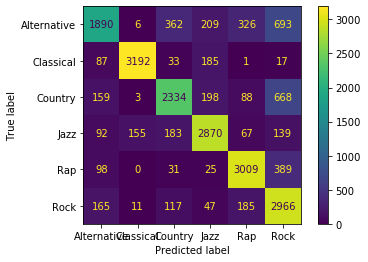

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay

forest = RandomForestClassifier(max_depth= 12, n_estimators=41 , min_samples_leaf= 7)
forest_fit = forest.fit(x_train, y_train)
pred_forest = forest_fit.predict(x_test)
print(classification_report(y_test, pred_forest))
ConfusionMatrixDisplay.from_estimator(forest, x_train, y_train)